<a href="https://colab.research.google.com/github/pujitha014/MACHINE_LEARNING/blob/main/pcg_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import time
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM,Input,Dropout,Dense,RepeatVector,TimeDistributed
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
import seaborn as sns

In [ ]:
file = "Test_2.csv"
d = pd.read_csv(file)
d['Elapsed time'] = d['Elapsed time'].str.replace("'","", regex=True)
print(d)

d.to_csv(file,index=False)

d['Elapsed time'] = pd.to_datetime(d['Elapsed time'])
d.set_index('Elapsed time', inplace=True)

d_resampled = d.resample("10S").agg({"PCG": "mean"})
d_resampled.reset_index(inplace=True)

print(d_resampled)

mean_pcg = d_resampled['PCG'].mean()
d_resampled['PCG'].fillna(mean_pcg, inplace=True)

d_resampled.to_csv('TEST_1.csv')

t1 = pd.read_csv('TEST_1.csv')
dfrt = t1.loc[:, ['Elapsed time', 'PCG']].copy()
print(dfrt)


       Elapsed time    PCG
0          0:00.000 -200.0
1          0:00.003    0.0
2          0:00.006    0.0
3          0:00.009    0.0
4          0:00.012 -200.0
...             ...    ...
199795     9:59.985 -200.0
199796     9:59.988 -200.0
199797     9:59.991    0.0
199798     9:59.994    0.0
199799     9:59.997    0.0

[199800 rows x 2 columns]
            Elapsed time         PCG
0    2023-11-10 00:00:00 -357.142857
1    2023-11-10 00:00:10 -392.857143
2    2023-11-10 00:00:20 -327.272727
3    2023-11-10 00:00:30 -370.909091
4    2023-11-10 00:00:40 -371.428571
...                  ...         ...
3595 2023-11-10 09:59:10 -303.571429
3596 2023-11-10 09:59:20 -109.090909
3597 2023-11-10 09:59:30 -741.818182
3598 2023-11-10 09:59:40 -210.714286
3599 2023-11-10 09:59:50 -370.909091

[3600 rows x 2 columns]
             Elapsed time         PCG
0     2023-11-10 00:00:00 -357.142857
1     2023-11-10 00:00:10 -392.857143
2     2023-11-10 00:00:20 -327.272727
3     2023-11-10 00:00:30 -3

In [ ]:
df = pd.read_csv("GW_36_1.csv")
df['Elapsed time'] = df['Elapsed time'].str.replace("'","", regex=True)
print(df)
df.to_csv("GW_36_1.csv",index=False)


       Elapsed time      PCG
0          0:00.000  -3000.0
1          0:00.003    800.0
2          0:00.006    200.0
3          0:00.009  -2000.0
4          0:00.012  -3400.0
...             ...      ...
304372    16:04.030   -400.0
304373    16:04.033   1400.0
304374    16:04.036   5600.0
304375    16:04.039  12200.0
304376    16:04.042      NaN

[304377 rows x 2 columns]


In [ ]:
# df = pd.read_csv("GW_36_1.csv")
# df['Elapsed time']=df['Elapsed time'].apply(pd.to_datetime, format='%M:%S.%f')
# #df['Elapsed time']=pd.to_datetime(df['Elapsed time'])
# #df.to_csv("GW_36_1.csv",index=False)
# df.head()
# df.shape

mean_pcg = df_resampled['PCG'].mean()
df_resampled['PCG'].fillna(mean_pcg, inplace=True)

# Create a new DataFrame with both 'Elapsed time' and 'PCG' columns
new_df = df_resampled[['Elapsed time', 'PCG']]

# Reset the index
new_df.reset_index(drop=True, inplace=True)

# Save the new DataFrame to a CSV file
new_df.to_csv('Modified.csv')


             Elapsed time          PCG
0     2023-11-10 00:00:00  -317.857143
1     2023-11-10 00:00:10  -157.142857
2     2023-11-10 00:00:20  -312.727273
3     2023-11-10 00:00:30   -94.545455
4     2023-11-10 00:00:40  -375.000000
...                   ...          ...
5780  2023-11-10 16:03:20  -374.545455
5781  2023-11-10 16:03:30   -18.181818
5782  2023-11-10 16:03:40  -385.714286
5783  2023-11-10 16:03:50   -98.181818
5784  2023-11-10 16:04:00  1457.142857

[5785 rows x 2 columns]


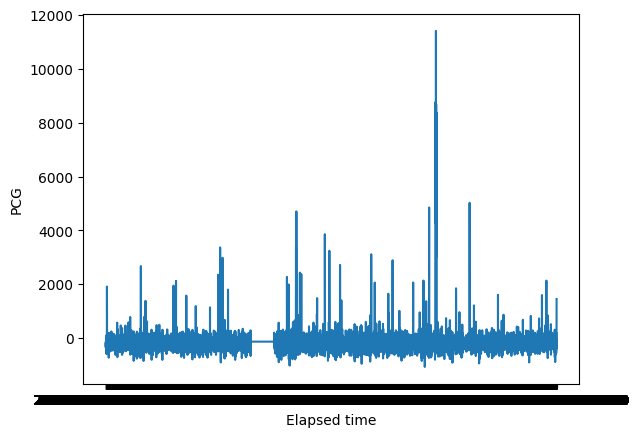

In [ ]:
t = pd.read_csv('Modified.csv')
dfr = t.loc[:, ['Elapsed time', 'PCG']].copy()
print(dfr)

sns.lineplot(x = dfr['Elapsed time'], y =dfr['PCG'])

scaler = StandardScaler()
scaler = scaler.fit(dfr[['PCG']])
dfr.loc[:, 'PCG'] = scaler.transform(dfr[['PCG']])

scaler = scaler.fit(dfrt[['PCG']])
dfrt.loc[:, 'PCG'] = scaler.transform(dfrt[['PCG']])

In [ ]:
n = 10
def sequence(x,y,n1):
  x_values = []
  y_values = []
  for i in range(len(x)-n1):
    x_values.append(x.iloc[i:(i+n1)])
    y_values.append(y.iloc[i+n1])
  return np.array(x_values), np.array(y_values)

trainX, trainY = sequence(dfr[['PCG']], dfr['PCG'], n)
testX, testY = sequence(dfrt[['PCG']], dfrt['PCG'], n)

print(trainX.shape)
print(trainY.shape)

print(testX.shape)
print(testY.shape)

NameError: ignored

In [ ]:
model = Sequential()
model.add(LSTM(128,input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(Dropout(rate = 0.2))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam',loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 10, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 10, 1)            129       
 ibuted)                                                

Epoch 1/50
203/203 [==============================] - 18s 57ms/step - loss: 0.3456 - val_loss: 0.3532
Epoch 2/50
203/203 [==============================] - 11s 52ms/step - loss: 0.3443 - val_loss: 0.3529
Epoch 3/50
203/203 [==============================] - 11s 52ms/step - loss: 0.3444 - val_loss: 0.3528
Epoch 4/50
203/203 [==============================] - 9s 44ms/step - loss: 0.3443 - val_loss: 0.3522
Epoch 5/50
203/203 [==============================] - 10s 52ms/step - loss: 0.3442 - val_loss: 0.3535
Epoch 6/50
203/203 [==============================] - 11s 52ms/step - loss: 0.3442 - val_loss: 0.3532
Epoch 7/50
203/203 [==============================] - 10s 51ms/step - loss: 0.3441 - val_loss: 0.3516
Epoch 8/50
203/203 [==============================] - 11s 54ms/step - loss: 0.3441 - val_loss: 0.3524
Epoch 9/50
203/203 [==============================] - 10s 49ms/step - loss: 0.3442 - val_loss: 0.3534
Epoch 10/50
203/203 [==============================] - 11s 52ms/step - loss: 0.3442

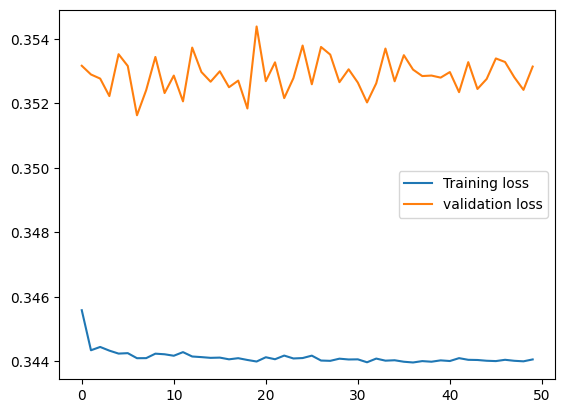

In [ ]:
h = model.fit(trainX,trainY,epochs=50,batch_size=32,validation_split =0.1)
plt.plot(h.history['loss'],label='Training loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()

225/225 [==============================] - 5s 17ms/step
16.753568587534808
26
7172


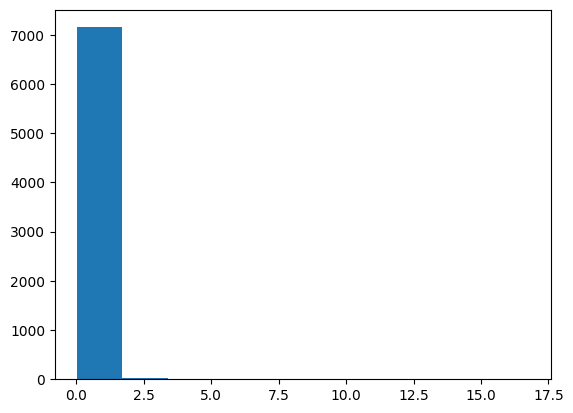

In [ ]:
train_predict = model.predict(trainX)
train_MAE = np.mean(np.abs(train_predict-trainX),axis =1)
print(train_MAE.max())
plt.hist(train_MAE,bins=10)
max_train_MAE = 2.6
c =0
for i in range(len(train_MAE)):
 if(train_MAE[i]>max_train_MAE):
   c+=1
print(c)
c1= train_MAE.shape[0]-c
print(c1)


113/113 [==============================] - 3s 27ms/step
(3590, 1)
11
3579
Normal


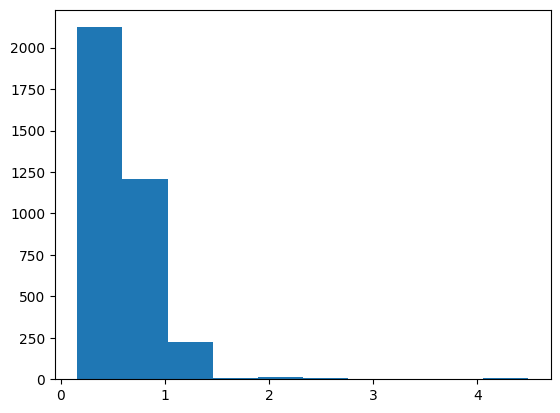

In [ ]:
test_predict = model.predict(testX)
test_MAE = np.mean(np.abs(test_predict-testX),axis =1)
print(test_MAE.shape)
plt.hist(test_MAE,bins=10)

c=0
c1=0
for i in range(len(test_MAE)):
 if(test_MAE[i]>max_train_MAE):
   c+=1
print(c)
c1= test_MAE.shape[0]-c
print(c1)

if(c>=25):
  print("Anamoly")
else:
  print("Normal")
